In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
arms = np.array([2,3,4,5])/10
K = len(arms)
nb_step = 7000
nb_ite = 200

In [3]:
def greedy(rewards, trials):
    return np.argmax(rewards/trials)
    

In [4]:
def epsilon_greedy(rewards, trials, epsilon=0.1):
    if np.random.rand() < epsilon:
        return np.random.randint(K)
    else:
        return np.argmax(rewards/trials)


In [5]:
def UCB1(rewards, trials):
    mu = rewards/trials
    U = np.sqrt((2*np.log(np.sum(trials))/trials))
    return np.argmax(mu + U)
    

In [6]:
def slot(arm_k):
    u = np.random.rand()
    reward = 0.

    if u < arm_k:
        reward = 1.
    return reward


In [7]:
def run(algorithm, nb_ite, nb_step, K, arms, n=1):
    nb_selected_arms = np.zeros((nb_step, K))
    time_sum_reward = np.zeros(nb_step)
    for i in range(nb_ite):
        trials = np.zeros(K)
        rewards = np.zeros(K)
        
        for t in range(n*K):
            choice_arms = np.where(trials <  n)[0]
            k = choice_arms[np.random.randint(len(choice_arms))]
            reward = slot(arm_k=arms[k])
            rewards[k] += reward
            trials[k] += 1
            nb_selected_arms[t, k] += 1
            time_sum_reward[t] += reward
            
        for t in range(n*K, nb_step):
            print("\r", (i, t), end="")
            k = algorithm(rewards, trials)
            reward = slot(arm_k=arms[k])
            rewards[k] += reward
            time_sum_reward[t] += reward

            trials[k] += 1
            nb_selected_arms[t, k] += 1

    return nb_selected_arms/nb_ite, time_sum_reward/nb_ite

In [8]:
g_average_nb_selected_arms, g_time_average_reward = run(algorithm=greedy, nb_ite=nb_ite, nb_step=nb_step, K=K, arms=arms, n=1)

 (199, 6999)

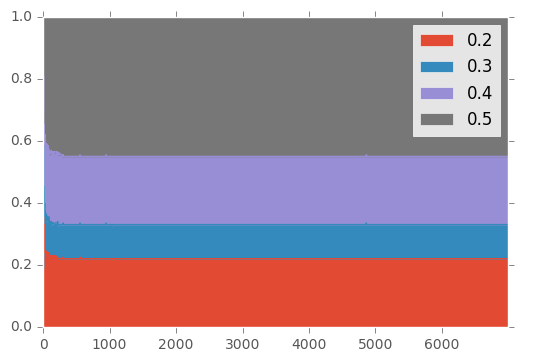

In [9]:
df = pd.DataFrame(g_average_nb_selected_arms, columns=['0.2', '0.3', '0.4', '0.5'])
df.plot.area();


In [10]:
ge_average_nb_selected_arms, ge_time_average_reward = run(algorithm=epsilon_greedy, nb_ite=nb_ite, nb_step=nb_step, K=K, arms=arms, n=1)

 (199, 6999)

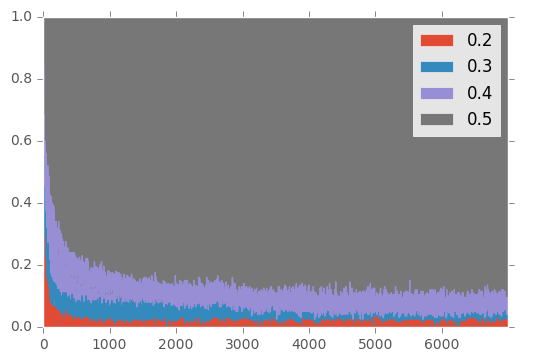

In [11]:
df = pd.DataFrame(ge_average_nb_selected_arms, columns=['0.2', '0.3', '0.4', '0.5'])
df.plot.area();

In [12]:
u_average_nb_selected_arms, u_time_average_reward = run(algorithm=UCB1, nb_ite=nb_ite, nb_step=nb_step, K=K, arms=arms, n=1)

 (199, 6999)

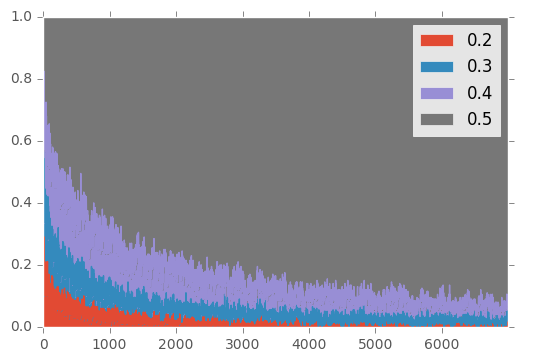

In [13]:
df = pd.DataFrame(u_average_nb_selected_arms, columns=['0.2', '0.3', '0.4', '0.5'])
df.plot.area();

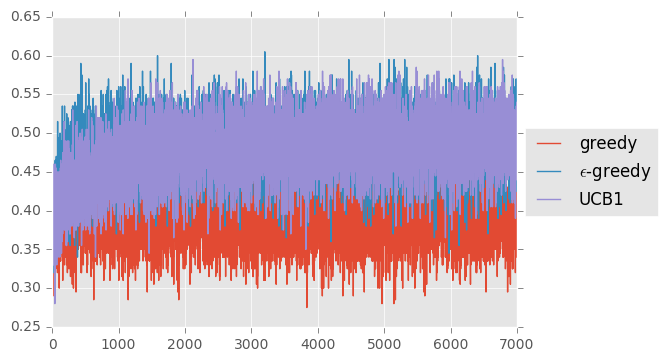

In [14]:
plt.plot(range(nb_step), g_time_average_reward, label="greedy")
plt.plot(range(nb_step), ge_time_average_reward, label="$\epsilon$-greedy")
plt.plot(range(nb_step), u_time_average_reward, label="UCB1")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))